In [1]:
!git clone https://github.com/ImagingYeditepe/Segmentation-of-Teeth-in-Panoramic-X-ray-Image.git

# These codes are just demo . Not include all paper .

Cloning into 'Segmentation-of-Teeth-in-Panoramic-X-ray-Image'...
remote: Enumerating objects: 211, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 211 (delta 7), reused 0 (delta 0), pack-reused 196
Receiving objects: 100% (211/211), 22.60 MiB | 32.69 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
sys.path.append("/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image")

In [4]:
%cd /content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image
#!pip install -qr requirements.txt
#You can  use pip install however colab includes all libraries so we dont need them

/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image


In [ ]:
from download_dataset import *
import os
path = "/content/Data"
if os.path.exists(path+'/DentalPanoramicXrays.zip') == False:
  os.mkdir(path)
  download_dataset(path+'/')

In [6]:
from images_prepare import *
#pre_images(resize_shape,path,include_zip)
X,X_sizes=pre_images((512,512),path,True)

FileNotFoundError: ignored

In [9]:
from masks_prepare import *
#Y=pre_masks(resize_shape=(512,512),path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Original_Masks')  ORIGINALL MASKS function
Y=pre_splitted_masks(path='/content/Segmentation-of-Teeth-in-Panoramic-X-ray-Image/Custom_Masks') #Custom Splitted MASKS size 512x512

In [10]:
X=np.float32(X/255)
Y=np.float32(Y/255)

NameError: ignored

In [ ]:
x_train=X[:105,:,:,:]
y_train=Y[:105,:,:,:]
x_test=X[105:,:,:,:]
y_test=Y[105:,:,:,:]

In [ ]:
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-ec3lr12q
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-ec3lr12q
     |████████████████████████████████| 48.3 MB 1.3 MB/s 
  Created wheel for albumentations: filename=albumentations-1.2.0-py3-none-any.whl size=114151 sha256=ff29defa5b2ce04c577b90d018f5a2168cd70d5e6234ce02932933ae7cc91777
  Stored in directory: /tmp/pip-ephem-wheel-cache-go7r6k65/wheels/63/11/1a/c77caf3ae9b9b6d57b3ee5e6a41a50f3bc12c66a70f6b90bf0
Successfully built albumentations
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [ ]:
!pip uninstall opencv-python-headless==4.5.5.62

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/cv2/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless-4.6.0.66.dist-info/*
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavformat-8ef5c7db.so.58.76.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libavutil-9c768859.so.56.70.100
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libbz2-a273e504.so.1.0.6
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libcrypto-d21001fc.so.1.1
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libgfortran-91cc3cb1.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/opencv_python_headless.libs/libopenblas-r0-f650aae0.3.3.so
    /usr/local/lib/python3.7/dis

In [ ]:
!pip install opencv-python-headless==4.5.2.52

y
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.2 MB/s 


In [ ]:
import cv2

import albumentations as A
#Augmention . Change what you want ! Care about Your GPU and CPU RAM

#If you get error : cannot import name '_registerMatType' from 'cv2.cv2' :
#!pip uninstall opencv-python-headless==4.5.5.62
#!pip install opencv-python-headless==4.5.2.52

aug = A.Compose([
    A.OneOf([A.RandomCrop(width=512, height=512),
                 A.PadIfNeeded(min_height=512, min_width=512, p=0.5)],p=0.4),
    A.RandomBrightnessContrast(brightness_limit=0.25, contrast_limit=0.25,p=0.5),
    A.Compose([A.RandomScale(scale_limit=(-0.15, 0.15), p=1, interpolation=1),
                            A.PadIfNeeded(512, 512, border_mode=cv2.BORDER_CONSTANT),
                            A.Resize(512, 512, cv2.INTER_NEAREST), ],p=0.5),
    A.ShiftScaleRotate (shift_limit=0.325, scale_limit=0.15, rotate_limit=15,border_mode=cv2.BORDER_CONSTANT, p=1),
    A.Rotate(15,p=0.5),
    A.Blur(blur_limit=1, p=0.5),
    A.Downscale(scale_min=0.15, scale_max=0.25,  always_apply=False, p=0.5),
    A.GaussNoise(var_limit=(0.05, 0.1), mean=0, per_channel=True, always_apply=False, p=0.5),
    A.HorizontalFlip(p=0.25),
])

x_train1=np.copy(x_train)
y_train1=np.copy(y_train)
count=0
while(count<4):
  x_aug2=np.copy(x_train1)
  y_aug2=np.copy(y_train1)
  for i in range(len(x_train1)):
    augmented=aug(image=x_train1[i,:,:,:],mask=y_train1[i,:,:,:])
    x_aug2[i,:,:,:]= augmented['image']
    y_aug2[i,:,:,:]= augmented['mask']
  x_train=np.concatenate((x_train,x_aug2))
  y_train=np.concatenate((y_train,y_aug2))
  if count == 9:
    break
  count += 1

In [ ]:
import random
import matplotlib.pyplot as plt
random_number=random.randint(0,104)
print(random_number)

78


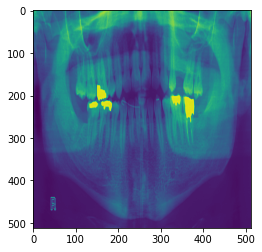

In [ ]:
#Checking data X  and Y matching
plt.imshow(x_train[random_number,:,:,0])

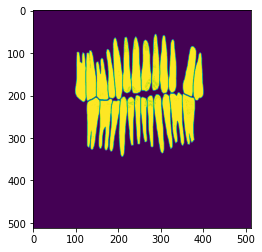

In [ ]:
#Checking data X  and Y matching
plt.imshow(y_train[random_number,:,:,0])

In [ ]:
import os

import tensorflow as tf
from tensorflow import keras
model=keras.models.load_model("/content/drive/MyDrive/dental_xray_segnewnewnew.h5")

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 4.8 MB/s 
     |████████████████████████████████| 57 kB 2.3 MB/s 
     |████████████████████████████████| 84 kB 3.5 MB/s 
     |████████████████████████████████| 272 kB 56.3 MB/s 
     |████████████████████████████████| 212 kB 41.1 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 2.3 MB 44.8 MB/s 
     |████████████████████████████████| 140 kB 74.4 MB/s 
     |████████████████████████████████| 84 kB 4.8 MB/s 
     |████████████████████████████████| 1.1 MB 65.3 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 74.8 MB/s 
     |████████████████████████████████| 271 kB 70.8 MB/s 
     |████████████████████████████████| 63 kB 2.4 MB/s 
     |████████████████████████████████| 80 kB 12.4 MB/s 
     |████████████████████████████████| 68 kB

In [ ]:
def convert_one_channel(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)>2:
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return img
    else:
        return img

def convert_rgb(img):
    #some images have 3 channels , although they are grayscale image
    if len(img.shape)==2:
        img= cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
        return img
    else:
        return img


In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import gradio as gr
from PIL import Image
import numpy as np
from CCA_Analysis import *
teeth_list=[]
def predict_image(img):

  plt.imsave("/content/drive/MyDrive/inputoutput/input.png",img)
  imgar=np.asarray(img)
  img_cv=convert_one_channel(imgar)
  img_cv=cv2.resize(img_cv,(512,512), interpolation=cv2.INTER_LANCZOS4)
  img_cv=np.float32(img_cv/255)

  img_cv=np.reshape(img_cv,(1,512,512,1))
  predict_img=model.predict(img_cv)
  ##model.save(path)
  predict=predict_img[0,:,:,0]
  plt.figure(figsize = (20,10))
  plt.title("Predict Mask",fontsize = 40)
  plt.imshow(predict)
  #For CCA, we saved
  plt.imsave("/content/predict.png",predict)



  ##Plotting - RESULT Example with CCA_Analysis
  img=cv2.imread("/content/drive/MyDrive/inputoutput/input.png")#original img 107.png

  #load image (mask was saved by matplotlib.pyplot)
  predicted=cv2.imread("/content/predict.png")

  predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

  cca_result,teeth_count,t_list=CCA_Analysis(img,predicted,3,2)
  plt.imsave("/content/drive/MyDrive/inputoutput/output.png",cca_result)
  listToStr = ' '.join(map(str, t_list))
  retstr=listToStr
  del listToStr
  redflagstring="The teeth that could be a problem while extracting are "
  greenflagstring="there are no deep teeth problems"
  retstr=redflagstring+retstr
  t_list.clear()
  return cca_result,retstr



gr.Interface(fn=predict_image,inputs="image",outputs=["image","textbox"]).launch()



Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://37763.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7faf16810350>,
 'http://127.0.0.1:7861/',
 'https://37763.gradio.app')

In [ ]:
  img=cv2.imread("/content/drive/MyDrive/inputoutput/input.png")#original img 107.png

  #load image (mask was saved by matplotlib.pyplot)
  predicted=cv2.imread("/content/predict.png")

  predicted = cv2.resize(predicted, (img.shape[1],img.shape[0]), interpolation=cv2.INTER_LANCZOS4)

  cca_result,teeth_count,t_list=CCA_Analysis(img,predicted,3,2)
  plt.imsave("/content/drive/MyDrive/inputoutput/output.png",cca_result)
  print("the teeth number with the red flag are " )
  print(t_list)
  t_list.clear()
  plt.imshow(cca_result)

error: ignored